In [1]:
%matplotlib inline
%pushd
%cd ".."
from mjs import tracks
from lib.rp_extract import rp_extract
from lib.rp_extract import rp_plot
from lib.rp_extract import audiofile_read
import numpy as np
%popd

/Users/marssaxman/musictools
/Users/marssaxman/musictools/scrapbook
popd -> ~/musictools/scrapbook


In [2]:
samplerate, samplewidth, wavedata = audiofile_read.audiofile_read(tracks.new_rhythm)
nsamples = wavedata.shape[0]
nchannels = wavedata.shape[1]
print samplerate, "Hz,", samplewidth*8, "bit,", nchannels, "channel(s),", nsamples, "samples"

Decoded .mp3 with: ffmpeg -v 1 -y -i /Users/marssaxman/Music/Track Library/1224427_New_Rhythm_Original_Mix.mp3 /var/folders/4h/ddd348056llf1xsn4qz35s4h0000gn/T/4c8e625f-ebac-4e50-bb02-2af047a3fcee.wav
44100 Hz, 16 bit, 2 channel(s), 17924516 samples


In [3]:
def plot_audio(samples):
    
    bins = 2048
    while len(samples.shape) > 1:
        samples = np.mean(samples, axis=1)
    length = samples.shape[0]
    if length > bins:
        samples = samples[0:-(length%bins)].reshape(bins,-1)
        samples = np.ravel(np.column_stack((samples.max(axis=1), samples.min(axis=1))))
    rp_plot.plotmono_waveform(samples, plot_width=16, plot_height=3)


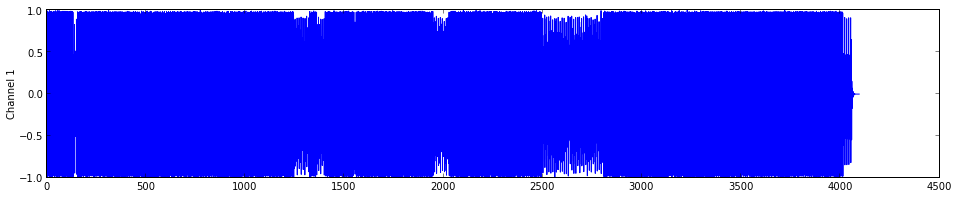

In [4]:

plot_audio(wavedata)

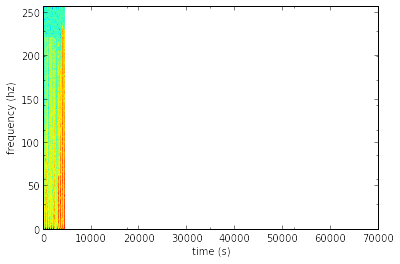

(array([     0.  ,  17504.25,  35008.5 ,  52512.75,  70017.  ], dtype=float32),
 ['0.01', '101.62', '203.23', '304.84', '406.45'],
 70018)

In [5]:
wavedata = np.mean(wavedata, axis=1)
rp_plot.plotstft(wavedata, samplerate, binsize=512, ignore=True)

In [11]:
features = rp_extract.rp_extract(wavedata,                            # the two-channel wave-data of the audio-file
                                samplerate,                          # the samplerate of the audio-file
                                extract_rh           = True,
                                 extract_rp          = True,          # <== extract this feature!
                                extract_ssd         = True,
                                 transform_db        = True,          # apply psycho-accoustic transformation
                                transform_phon      = True,          # apply psycho-accoustic transformation
                                transform_sone      = True,          # apply psycho-accoustic transformation
                                fluctuation_strength_weighting=True, # apply psycho-accoustic transformation
                                skip_leadin_fadeout = 1,             # skip lead-in/fade-out. value = number of segments skipped
                                step_width          = 1)             # 

Analyzing 66 segments


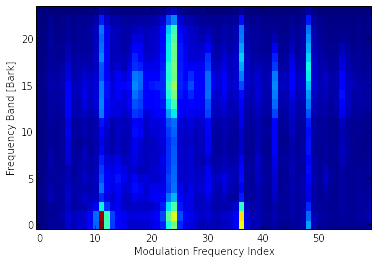

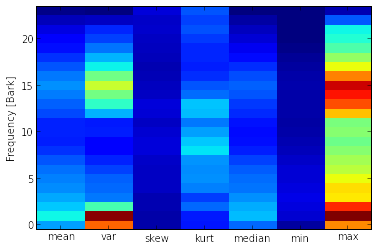

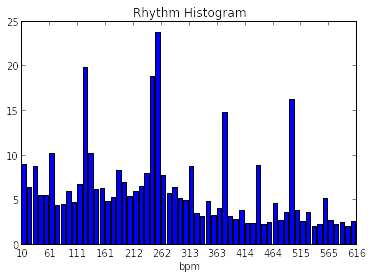

In [12]:
rp_plot.plotrp(features['rp'])
rp_plot.plotssd(features['ssd'])
rp_plot.plotrh(features['rh'])